MAE: 0.3605603788359235
MSE: 0.2204494736034648
RMSE: 0.46952047197482755
R2: 0.9907505918201437
Input: [340, 340.2, 340.5, 350, 350.2]
[351.43771061]
----------
Input: [340.2, 340.5, 350, 350.2, 351.43771060738527]
[354.39299387]
----------
Input: [340.5, 350, 350.2, 351.43771060738527, 354.3929938678959]
[356.22611709]
----------
Input: [350, 350.2, 351.43771060738527, 354.3929938678959, 356.2261170899433]
[356.91195766]
----------
Input: [350.2, 351.43771060738527, 354.3929938678959, 356.2261170899433, 356.91195765642544]
[358.22776413]
----------
Input: [351.43771060738527, 354.3929938678959, 356.2261170899433, 356.91195765642544, 358.227764133519]
[359.35265094]
----------
Input: [354.3929938678959, 356.2261170899433, 356.91195765642544, 358.227764133519, 359.3526509444127]
[359.99750399]
----------
Input: [356.2261170899433, 356.91195765642544, 358.227764133519, 359.3526509444127, 359.9975039930005]
[360.62029901]
----------
Input: [356.91195765642544, 358.227764133519, 359.35265

c:\Users\letuy\anaconda3\envs\recursive_ts_forecasting\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\letuy\anaconda3\envs\recursive_ts_forecasting\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\letuy\anaconda3\envs\recursive_ts_forecasting\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\letuy\anaconda3\envs\recursive_ts_forecasting\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\letuy\anaconda3\envs\recursive_ts_forecasting\Lib\site-packages\sklearn\utils\validation.py

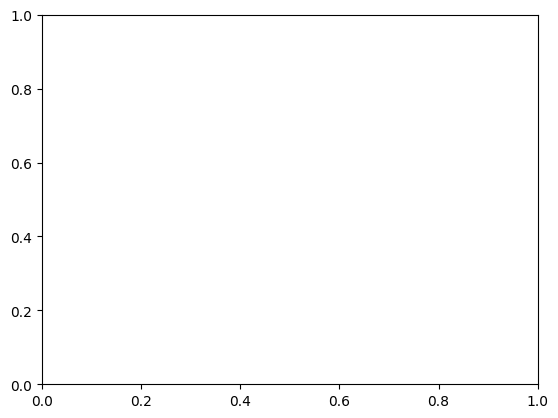

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

def create_ts_data(data, window_size=10):
    i = 1
    while i < window_size:
        data["co2_{}".format(i)] = data["co2"].shift(-i)
        i += 1
        
    data["target"] = data["co2"].shift(-i)
    data = data.dropna(axis=0)
    return data

data = pd.read_csv("../datasets/co2.csv")
data["time"] = pd.to_datetime(data["time"])
data["co2"] = data["co2"].interpolate()  # Noi suy

figure, axes = plt.subplots()
# print(data.info())
# axes.plot(data["time"], data["co2"])
# axes.set_xlabel("Time")
# axes.set_ylabel("CO2")
# plt.show()

window_size = 5
train_ratio = 0.8
data = create_ts_data(data, window_size)
num_samples = len(data)
x = data.drop(["time", "target"], axis=1)
y = data["target"]
x_train = x[:int(train_ratio * num_samples)]
y_train = y[:int(train_ratio * num_samples)]
x_test = x[int(train_ratio * num_samples):]
y_test = y[int(train_ratio * num_samples):]

# print(data.corr())

model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))
print("MSE: {}".format(mean_squared_error(y_test, y_predict)))
print("RMSE: {}".format(root_mean_squared_error(y_test, y_predict)))
print("R2: {}".format(r2_score(y_test, y_predict)))

sample_input = [340, 340.2, 340.5, 350, 350.2]
for i in range(10):
    print("Input: {}".format(sample_input))
    prediction = model.predict([sample_input])
    print(prediction)
    sample_input = sample_input[1:] + prediction.tolist()
    print("----------")

# figure, axes = plt.subplots()
# # print(data.info())
# axes.plot(data["time"][:int(train_ratio * num_samples)], y_train, label="train")
# axes.plot(data["time"][int(train_ratio * num_samples):], y_test, label="test")
# axes.plot(data["time"][int(train_ratio * num_samples):], y_predict, label="prediction")
# axes.set_xlabel("Time")
# axes.set_ylabel("CO2")
# axes.legend()
# axes.grid()
# plt.show()
